# Part-1 Programming Review 编程回顾

In [75]:
import pandas as pd 
from icecream import ic
import random
import numpy as np 
import matplotlib.pyplot as plt 
from collections import Counter
from sklearn.linear_model import LinearRegression
from scipy.spatial.distance import cosine
from collections import defaultdict
%matplotlib inline

##    Re-code the Linear-Regression Model using scikit-learning

In [5]:
random_data = np.random.random((20,2))
random_data

array([[0.74927823, 0.87028077],
       [0.99334514, 0.36486086],
       [0.06633811, 0.68707902],
       [0.09821254, 0.5823763 ],
       [0.22113012, 0.55348568],
       [0.2353623 , 0.67954797],
       [0.04099875, 0.68491693],
       [0.98036426, 0.72143849],
       [0.13266872, 0.39899688],
       [0.20259792, 0.00466061],
       [0.52192868, 0.82005086],
       [0.72963582, 0.74755574],
       [0.40367087, 0.0854062 ],
       [0.45007012, 0.96562285],
       [0.66211785, 0.25285068],
       [0.91928351, 0.29304742],
       [0.15987901, 0.70083869],
       [0.72641938, 0.42855076],
       [0.86567305, 0.47586628],
       [0.95379072, 0.41205803]])

In [6]:
X = random_data[:,0]
y = random_data[:,1]

In [7]:
def assumuing_function(x):
    return 13.4 * x + 5 + random.randint(-5,5)
assumuing_function(10)

141.0

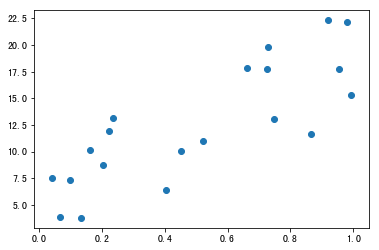

In [8]:
# 真实值
y = [assumuing_function(x) for x in X]
plt.scatter(X, y )

In [9]:
y = np.array(y)
LR = LinearRegression().fit(X.reshape(-1,1), y )

In [14]:
ic(LR.coef_,LR.intercept_,LR.fit_intercept)

ic| LR.coef_: array([13.3567209])
    LR.intercept_: 5.821883568234949
    LR.fit_intercept: True


(array([13.3567209]), 5.821883568234949, True)

In [13]:
LR.score(X.reshape(-1,1), y )

0.6629883488923246

In [16]:
#计算你预测值
def predict(x,lr_model):
    '''利用传入的LR模型计算预测值'''
    return lr_model.coef_ * x + LR.intercept_
predict([10,12,15],LR)

array([139.38909257, 166.10253438, 206.17269708])

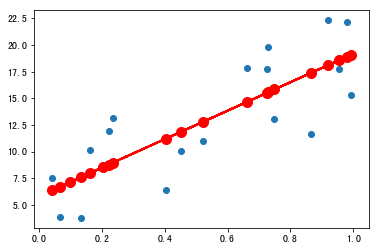

In [35]:
plt.scatter(X,y)
plt.plot(X, predict(X,LR),color='red',marker='o', linestyle='dashed', linewidth=2, markersize=10)

## . Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem

In [34]:
def model(x,y):
    '''根据输入的 x,y 数据产出点样本点'''
    return [(x_i, y_i) for x_i,y_i in zip(x,y)]

def distance(point_1,point_2):
    return cosine(point_1, point_2)
distance((0,1),(1,0))

def predict(X, y, x, k=5, job_type='C'):
    '''把输入的样本点，按照最近的5个邻居归类
    
    job_type: C:calssification, R:regressionn'''
    
    most_similars = sorted(model(X,y), key=lambda xi:distance(xi[0],x))[:k]

    if job_type == 'C':
        return Counter([y for x,y in most_similars]).most_common(1)[0][0]
    elif job_type == 'R':
        return np.array([y for x,y in most_similars]).mean()
    else:
        print(f"sorry not support job_type:{job_type}. please use 'C' for classification and 'R' for regreeion")
        exit(0)

In [33]:
X,y = [(1,1),(1,2),(3,5),(5,5),(2,3),(5,5)],[0,0,1,1,0,1]
x=[2,2]
predict(X,y, x, k=5, job_type='R')

[0, 1, 1, 0, 1] 0.6


0.6

## . Re-code the Decision Tree, which could sort the features by salience.

In [38]:
def entropy(elements):
    '''计算熵'''
    counter = Counter(list(elements))
    probs = [counter[c]/len(elements) for c in set(elements)]
    return -sum(p * np.log(p) for p in probs)

ic(entropy([0,1,1,1]))
ic(entropy([1,2,2,2]))

ic| entropy([0,1,1,1]): 0.5623351446188083
ic| entropy([1,2,2,2]): 0.5623351446188083


0.5623351446188083

In [39]:
ic(entropy([0,1,3,1]))
ic(entropy([1,2,2,2]))

ic| entropy([0,1,3,1]): 1.0397207708399179
ic| entropy([1,2,2,2]): 0.5623351446188083


0.5623351446188083

In [40]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

dataset = pd.DataFrame.from_dict(mock_data)
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [41]:
set(dataset['family_number'])

{1, 2}

In [42]:
sub_split_1 = dataset[dataset['family_number'] == 1]['bought'].tolist()
sub_split_1

[1, 1, 0, 0, 0]

In [43]:
sub_split_2 = dataset[dataset['family_number'] != 1]['bought'].tolist()
sub_split_2

[1, 1]

In [44]:
_sub_split_1 = dataset[dataset['gender'] != 'F']['bought'].tolist()
ic(_sub_split_1)
_sub_split_2 = dataset[dataset['gender'] != 'M']['bought'].tolist()
ic(_sub_split_2)

ic| _sub_split_1: [0, 0, 1]
ic| _sub_split_2: [1, 1, 1, 0]


[1, 1, 1, 0]

In [45]:
entropy(_sub_split_1) + entropy(_sub_split_2)

1.198849312913621

In [46]:
entropy(sub_split_1) + entropy(sub_split_2)

0.6730116670092565

In [50]:
def find_the_min_spilter(training_data:pd.DataFrame, target:str)-> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        ic(f)
        values = set(training_data[f])
        for v in values:
            sub_split_1 = training_data[training_data[f] == v][target].tolist()
            ic(sub_split_1)
            entropy_1 = entropy(sub_split_1)
            ic(entropy_1)
            sub_split_2 = training_data[training_data[f] != v][target].tolist()
            ic(sub_split_2)
            entropy_2 = entropy(sub_split_2)
            ic(entropy_2)
            entropy_totaal = entropy_1 + entropy_2
            if entropy_totaal < min_entropy:
                min_entropy = entropy_totaal
                spliter = (f,v)
    print(f'spliter is: {spliter}')
    print(f'the min entropy is:{min_entropy}')
    
    return spliter

In [51]:
%%time
find_the_min_spilter(dataset, 'bought')

ic| f: 'gender'
ic| sub_split_1: [0, 0, 1]
ic| entropy_1: 0.6365141682948128
ic| sub_split_2: [1, 1, 1, 0]
ic| entropy_2: 0.5623351446188083
ic| sub_split_1: [1, 1, 1, 0]
ic| entropy_1: 0.5623351446188083
ic| sub_split_2: [0, 0, 1]
ic| entropy_2: 0.6365141682948128
ic| f: 'family_number'
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.6730116670092565
ic| sub_split_2: [1, 1]
ic| entropy_2: -0.0
ic| sub_split_1: [1, 1]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1, 0, 0, 0]
ic| entropy_2: 0.6730116670092565
ic| f: 'income'
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.6730116670092565
ic| sub_split_2: [1, 1]
ic| entropy_2: -0.0
ic| sub_split_1: [1, 1]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1, 0, 0, 0]
ic| entropy_2: 0.6730116670092565


spliter is: ('family_number', 1)
the min entropy is:0.6730116670092565
Wall time: 1.4 s


('family_number', 1)

In [54]:
dataset[dataset['family_number'] == 1]

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [55]:
dataset[dataset['family_number'] != 1]

,gender,income,family_number,bought
2,F,+10,2,1
6,M,-10,2,1


In [56]:
find_the_min_spilter(dataset[dataset['family_number'] == 1], 'bought')

ic| f: 'gender'
ic| sub_split_1: [0, 0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1, 0]
ic| entropy_2: 0.6365141682948128
ic| sub_split_1: [1, 1, 0]
ic| entropy_1: 0.6365141682948128
ic| sub_split_2: [0, 0]
ic| entropy_2: -0.0
ic| f: 'family_number'
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.6730116670092565
ic| sub_split_2: []
ic| entropy_2: 0
ic| f: 'income'
ic| sub_split_1: [1, 0, 0, 0]
ic| entropy_1: 0.5623351446188083
ic| sub_split_2: [1]
ic| entropy_2: -0.0
ic| sub_split_1: [1]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 0, 0, 0]
ic| entropy_2: 0.5623351446188083


spliter is: ('income', '+10')
the min entropy is:0.5623351446188083


('income', '+10')

In [59]:
sub_set = dataset[dataset['family_number'] == 1]
sub_set[sub_set['income'] == '+10']

,gender,income,family_number,bought
0,F,+10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [60]:
sub_set[sub_set['income'] != '+10']

,gender,income,family_number,bought
1,F,-10,1,1


## Finish the K-Means using 2-D matplotlib

In [67]:
from sklearn.cluster import KMeans

In [68]:
X = [random.randint(0, 100) for _ in range(100)]
Y = [random.randint(0, 100) for _ in range(100)]

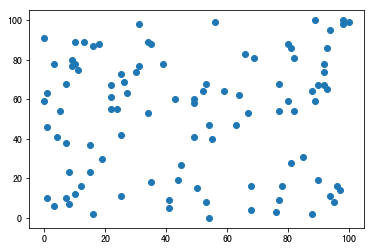

In [69]:
plt.scatter(X, Y)

In [70]:
tranning_data = [[x, y] for x, y in zip(X, Y)]

In [71]:
cluster = KMeans(n_clusters=6, max_iter=500)

In [72]:
cluster.fit(tranning_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [73]:
cluster.cluster_centers_

array([[45.375     , 12.625     ],
       [17.77777778, 74.92592593],
       [85.95      , 81.9       ],
       [84.07692308, 13.61538462],
       [58.125     , 55.25      ],
       [11.        , 22.125     ]])

In [74]:
cluster.labels_

array([1, 5, 2, 3, 4, 4, 2, 1, 5, 1, 2, 3, 3, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       2, 4, 4, 5, 3, 4, 1, 3, 3, 5, 5, 2, 1, 3, 4, 4, 1, 4, 4, 2, 1, 4,
       5, 5, 5, 0, 2, 4, 1, 3, 5, 2, 1, 1, 1, 3, 2, 0, 2, 1, 4, 3, 3, 1,
       4, 4, 2, 0, 3, 0, 5, 1, 1, 5, 1, 2, 1, 2, 5, 0, 0, 5, 5, 0, 1, 1,
       1, 2, 4, 1, 5, 2, 3, 2, 1, 4, 5, 0])

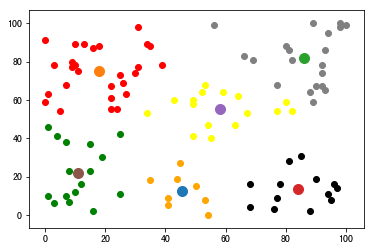

In [76]:
centers = defaultdict(list)
for label, location in zip(cluster.labels_, tranning_data):
    centers[label].append(location)
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])
        
for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)

# Part-2 Question and Answer

## What's the model? why all the models are wrong, but some are useful?

ans:模型是对要要研究的问题的一个模拟和简化，因为模型是对特定问题和场景的模拟和简化所以这个模型对这个问题或者场景是有效的，dataset是随着问题和场景的吧改变模型很大可能就失效了，因为问题不同场景不一样假设就不成立。说的简单点：模型是一个或者一组(建立在一些假设或者前提条件下的)线性换货飞线性函数。

## What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting.

underfitting：欠拟合一般指模型学习能力较弱，而数据复杂度较高的情况出现，此时模型由于学习能力不足，无法学习到数据集中的“一般规律”，因而导致泛化能力弱
overfitting：过拟合通常指模型学习能力过强，由于模型学习能力太强，以至于将训练集单个样本自身的特点都能捕捉到，并将其认为是“一般规律”，同样这种情况也会导致模型泛化能力下降

3.产生的原因

欠拟合(underfitting)：
（1）模型复杂度过低 （2）特征量过少

过拟合(overfitting)：

（1）参数太多，模型复杂度过高 

（2）样本噪音干扰过大，使得机器将部分噪音认为是特征从而扰乱了预设的分类规则

（3）参数太多，模型复杂度过高

4.解决方案

解决欠拟合(underfitting)：

（1）增加新特征

（2）适当增加模型的复杂度，换复杂度更高的模型

解决过拟合(overfitting)：
数据层面：
（1）数据扩增，即增加训练数据样本
（2）特征工程，筛选组合得到更高质量的特征。
模型层面：
（1）正则化（Regularization）（L1和L2）以及树模型的剪枝策略，XGBoost中的正则项惩罚
（2）降低模型的复杂度(比如树模型可以降低树的 深度，增大树的棵树)，选择较为简单的模型

## What's the precision, recall, AUC, F1, F2score. What are they mainly target on?

TP:true positive

FN:false negative

FP:false positive

TN:true negative

$$ Precision = \frac{TP}{(TP+FP)}$$
$$ Recall = \frac{TP}{(TP+FN)}$$
$$ f1   sccore = \frac{2*Precision*Recall}{(Precision+Recall)}$$

ROC:Receiver Operating Characteristic
以FPR为横轴，TPR为纵轴。
FPR（实际为负的样本中，被预测为正的概率，False Positive Rate）：$$FPR=\frac{FP}{(FP+TN)}$$
TPR（正样本中，被预测为正的概率，True Positive Rate，也就是Recall）：$$TPR=\frac{TP}{(TP+FN)}$$

AUC（Area Under Curve）
ROC曲线下的面积，在（0,1）之间，一般在（0.5,1）之间。
AUC越大，表明效果越好。

## Based on our course and yourself mind, what's the machine learning?

ans:机器学习是一个过程，这个过程目的是基于已有数据，从数据中发现一些潜在的规律，总结这些规律应用到新的数据上。

## 正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？

ans:正确。因为机器学习模型的目的是为了解决具体问题的，定义模型的评价标准就是检验我的问题有没有解决。定义了问题就相当于有了目标，用行话说就是定义好了目标函数，定义好了目标函数，就是选择什么模型的问题了。

# Part-03 Programming Practice 编程练习

In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a completed Decision Tree Model. You show finish a predicate() function, which accepts three parameters <gender, income, family_number>, and outputs the predicated 'bought': 1 or 0

In [ ]:
def partition_entropy(subsets):
    '''find the entropy from this paartition of data into 
    subsets
    '''
    total_count = sum(len(subset) for subset in subsets )
    return sum(data_entropy(subset)/total_count for subset in subsets)